In [1]:
import pandas as pd
import matplotlib.pyplot as pl
from Theta2ConCorteHadronness import *
%matplotlib inline

# Buscando señal en Cyg-X1
Aquí tenemos los datos de ** Cyg-X1 ** ... veamos como buscamos señal en ellos

Lo primero es leer los datos que hemos tomado. Veo que Daniel usaba una función que se ha creado él sin explicar mucho que hace realmente... eso está bien para empezar, pero quizás ya es hora de ver que hay dentro de la función:
Cuando Daniel hace **leer("luna")**, lo que hace en realidad es:
> **luna=pd.read_csv("EmisionLuna.txt", , sep=' ')**

Y con esto crea una variable **luna** que tiene toda información que hay en el fichero "EmisionLuna.txt".

![luna](screen_datos.png "luna")

Hay 3 columnas y varias filas, Aquí solo vemos las 5 primeras.  
Si queremos usar los datos de la **longitud de onda**, los encontramos aquí:
> **luna.LongituOnda**

Si queremos los os datos de la **Emision**, los encontramos aquí:
> **luna.Emision**

La primera columna es un índice. Como el que hay en un Excel, por ejemplo.

Para ver las primeras 5 filas del fichero podemos hacer:
>**luna.head(5)**

Para ver cuantas filas hay en los datos podemos hacer:
>**len(luna)**

----------
Veamos cómo lo hacemos con mis datos de CygX1. Primero vamos a leer los archivos que contienen los eventos para ON y OFF (os acordáis de qué es ON y OFF, ¿no?)

In [2]:
#Leemos los ficheros y les damos un nombre
cygX1_ON= pd.read_csv('data/EvtList_ON_CygX3_1day.txt', sep=' ')
cygX1_OFF= pd.read_csv('data/EvtList_OFF_CygX3_1day.txt', sep=' ')

Ahora sé que los valores de ** Theta cuadrado ** para mis datos ON y OFF los encuentro así:

> **cygX1_ON.theta2  
> cygX1_OFF.theta2**


In [3]:
# Miramos qué aspecto tienen los 5 primeros valores de theta2 del ON, por ejemplo
cygX1_ON
cygX1_ON.theta2.head(5)


0    0.149
1    0.178
2    0.011
3    0.020
4    0.317
Name: theta2, dtype: float64

In [4]:
# Y también cuantas filas tiene el fichero
len(cygX1_ON)

32654

Más de 30 mil eventos detectados por el telescopio. Esto no es ningún juego!  
Aunque mirar los datos así no sirve para mucho. Lo que tenemos que hacer es representarlos gráficamente.

--------
Ahora que lo pienso, Daniel tampoco os ha mostrado como hacer el famoso ** Theta Plot **, cuando le vea le echo una bronca de las buenas.

Nada, hagámoslo... en lugar de hacer el simple ** histograma("casa", "off")** se tienen que dar algunos pasos más:

1. Definir el tamaño y colores del espacio donde haremos el gráfico
2. Hacer el gráfico de barras para el ON ( **cygX1_ON.theta2** ) y el OFF ( **cygX1_OFF.theta2** )
3. Poner nombre a los ejes
4. Mostrar el gráfico

Veamos como se hace:

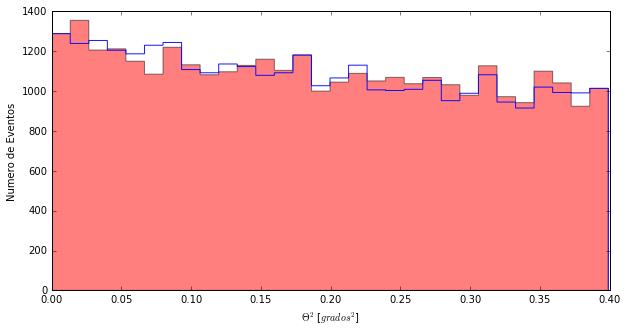

In [5]:
# 1 Definir espacio figura
pl.figure(1, figsize=(10, 5), facecolor='w', edgecolor='k')
# 2 Gráfico de barras ... cygX1_OFF.theta2 y cygX1_ON.theta2 es donde tengo los valores
# que hay que representar, el resto es cosmética de los gráficos, no le deis
# importancia por ahora
pl.hist(cygX1_OFF.theta2, bins=30, histtype='stepfilled',alpha=0.5, color='red', normed=False)
pl.hist(cygX1_ON.theta2, bins=30, histtype='step',alpha=0.9, color = 'blue', normed=False)
# 3 Nombre para los ejes
pl.xlabel('$\Theta^2$ [$grados^2$]')
pl.ylabel('Numero de Eventos')
# 4 A mostrar el gráfico ...
pl.show()

Aquí no hay nada ... pero es que Daniel os ha hecho trampas no solo con el código, sino también con el análisis.

Uno de los grandes problemas de los ** Cazadores de Rayos Gamma**, es que además de llegarnos rayos gamma, nos llegan núcleos de átomos (mayoritariamente protones). Así que para ver algo necesitamos quitarnos de encima estos otros rayos.

Mira como queda el ** Theta Plot ** cuando me quito de encima los protones:

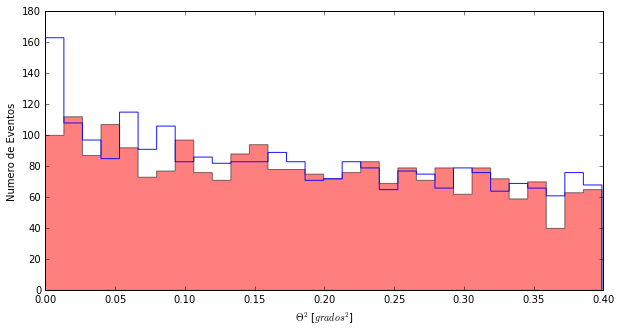

In [6]:
from Theta2ConCorteHadronness import *
Non, Noff = histograma_hadronness(0.20)

Ahora soy yo quien hace trampas y no os enseño como me quedo solo con eventos con hadronness pequeño, :D.

Pero no me digáis que no queda bonito el gráfico. Podéis ver que hay muchos menos eventos que antes y que ... *** ¡¡¡HAY SEÑAL!!! ***

Veamos qué **significancia** tiene esta señal:

In [7]:
from Significancia import *
CalcularSignificancia(Non, Noff)

2.6845929556404116

No está mal, 2.7 sigma para el corte de 0.20... ¿Qué quiere decir esto? Sigue un rato más conmigo y te lo intento explicar.